# Deep Learning RP Group 17: Between-class Learning for Image Classification



This project is an assignment of the course CS4240 Deep Learning held by TU Delft.
In this project, we essentially reproduced part of the results of the paper [Between-class Learning for Image Classification](https://arxiv.org/abs/1711.10284). In this notebook, we ran all the stuffs through Google Colab(GPU mode) on line with a personal Google Drive mounted. Only running the code blocks in this notebook cannot directly give the results. To check other files and make the notebook work, please take a look at our [github](https://github.com/AncientreeBILL/TU-Delft-Deep-Learning-CS4240-Reproducibility-Project---Between-Class-Learning-for-Image-Classifica). 

To learning more about BC learning, please check the [github site](https://github.com/mil-tokyo/bc_learning_image) of the author. 

This notebook is only for learning purpose.

## The environment setup

In [0]:
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

--2020-03-20 17:26:21--  https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.195.57.194
Connecting to developer.nvidia.com (developer.nvidia.com)|152.195.57.194|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?-fXV8UlaNnZwtX4WK9BC26S-yUci-FRaqoJQYduEbF6oyGTL5Ok3BexKksO5xE6oAnqyy4Z65i9foyj3bom0ZfwDq6VuqXxCRhzWrYNO_UTBVxChFBWxz0dajU8AnkKWPzXVUj9-8Jr9X0xyxHQmWj2OGU_5sqbmNCW9TCEYWT8MUKke4zRyysE9zHpcDM3CWFjCjE93et0mBbwsB16Xlzjmdg [following]
--2020-03-20 17:26:22--  https://developer.download.nvidia.com/compute/cuda/8.0/secure/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb?-fXV8UlaNnZwtX4WK9BC26S-yUci-FRaqoJQYduEbF6oyGTL5Ok3BexKksO5xE6oAnqyy4Z65i9foyj3bom0ZfwDq6VuqX

In [0]:
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb

Selecting previously unselected package cuda-repo-ubuntu1604-8-0-local-ga2.
(Reading database ... 144542 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb ...
Unpacking cuda-repo-ubuntu1604-8-0-local-ga2 (8.0.61-1) ...
Setting up cuda-repo-ubuntu1604-8-0-local-ga2 (8.0.61-1) ...
Note: Check first if apt-key functionality is needed at all - it probably isn't!
OK


In [0]:
!apt-key add /var/cuda-repo-8-0-local-ga2/7fa2af80.pub

OK


In [0]:
!apt update

Get:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Ign:1 file:/var/cuda-repo-8-0-local-ga2  InRelease
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:2 file:/var/cuda-repo-8-0-local-ga2  Release [574 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Get:3 file:/var/cuda-repo-8-0-local-ga2  Release.gpg [819 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:5 file:/var/cuda-repo-8-0-local-ga2  Packages [22.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRe

In [0]:
!apt install cuda-8-0 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cuda-command-line-tools-8-0 cuda-core-8-0 cuda-cublas-8-0
  cuda-cublas-dev-8-0 cuda-cudart-8-0 cuda-cudart-dev-8-0 cuda-cufft-8-0
  cuda-cufft-dev-8-0 cuda-curand-8-0 cuda-curand-dev-8-0 cuda-cusolver-8-0
  cuda-cusolver-dev-8-0 cuda-cusparse-8-0 cuda-cusparse-dev-8-0
  cuda-demo-suite-8-0 cuda-documentation-8-0 cuda-driver-dev-8-0
  cuda-license-8-0 cuda-misc-headers-8-0 cuda-npp-8-0 cuda-npp-dev-8-0
  cuda-nvgraph-8-0 cuda-nvgraph-dev-8-0 cuda-nvml-dev-8-0 cuda-nvrtc-8-0
  cuda-nvrtc-dev-8-0 cuda-runtime-8-0 cuda-samples-8-0 cuda-toolkit-8-0
  cuda-visual-tools-8-0
The following NEW packages will be installed:
  cuda-8-0 cuda-command-line-tools-8-0 cuda-core-8-0 cuda-cublas-8-0
  cuda-cublas-dev-8-0 cuda-cudart-8-0 cuda-cudart-dev-8-0 cuda-cufft-8-0
  cuda-cufft-dev-8-0 cuda-curand-8-0 cuda-curand-dev-8-0 cuda-cusolver-8-0
  cuda-cuso

In [0]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [0]:
!apt install gcc-5 g++-5 -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 25 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 5.5.0-12ubuntu1 [17.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libisl15 amd64 0.18-4 [548 kB]
Get:3 http://arch

In [0]:
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc 
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

In [0]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'

In [0]:
!pip install cupy 

     |████████████████████████████████| 3.7MB 2.8MB/s 
  Created wheel for cupy: filename=cupy-7.2.0-cp36-cp36m-linux_x86_64.whl size=22398906 sha256=c91f28b4ac34cb1ab3e844426209e0b498cb2ef73dd4a4e43be037772f22bab5
  Stored in directory: /root/.cache/pip/wheels/dd/b7/a5/021863b6203b531f18709d1a48f779a42d1426a47298c6db0b
Successfully built cupy


## The setup of Our Project

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [0]:
import sys
sys.path.append('/content/drive/My Drive/DL')

## The Training Process (Run Multiple Times with Different Arguments)

In [20]:
!python /content/drive/My\ Drive/DL/main.py --dataset cifar10 --netType convnet --data /content/drive/My\ Drive/DL/cifar-10-batches-py/ --nTrials 1

+------------------------------+
| CIFAR classification
+------------------------------+
| dataset  : cifar10
| netType  : convnet
| learning : standard
| nEpochs  : 250
| LRInit   : 0.1
| schedule : [0.4, 0.6, 0.8]
| warmup   : 0
| batchSize: 128
+------------------------------+
+-- Trial 1 --+
| Epoch: 1/250 | Train: LR 0.1  Loss 2.134  top1 70.88 | Val: top1 57.45
| Epoch: 2/250 | Train: LR 0.1  Loss 1.478  top1 53.68 | Val: top1 44.23
| Epoch: 3/250 | Train: LR 0.1  Loss 1.240  top1 43.53 | Val: top1 37.20
| Epoch: 4/250 | Train: LR 0.1  Loss 1.104  top1 38.46 | Val: top1 34.13
| Epoch: 5/250 | Train: LR 0.1  Loss 1.007  top1 35.09 | Val: top1 33.75
| Epoch: 6/250 | Train: LR 0.1  Loss 0.946  top1 32.44 | Val: top1 33.07
| Epoch: 7/250 | Train: LR 0.1  Loss 0.900  top1 30.72 | Val: top1 27.81
| Epoch: 8/250 | Train: LR 0.1  Loss 0.868  top1 29.44 | Val: top1 29.96
| Epoch: 9/250 | Train: LR 0.1  Loss 0.840  top1 28.41 | Val: top1 26.40
| Epoch: 10/250 | Train: LR 0.1  Loss 0.809  t

## Results

In [0]:
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('/content/drive/My Drive/DL')
path = '/content/drive/My Drive/DL'
x = range(0, 250)

### The Results of Different BC Methods

In [0]:
t_s = np.loadtxt(path + '/t_std.txt')
v_s = np.loadtxt(path + '/v_std.txt')
t_bc = np.loadtxt(path + '/t_bc.txt')
v_bc = np.loadtxt(path + '/v_bc.txt')
t_bcp = np.loadtxt(path + '/t_bc_p.txt')
v_bcp = np.loadtxt(path + '/v_bc_p.txt')

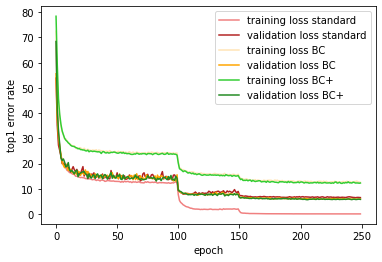

In [0]:
plt.plot(x, t_s, color='lightcoral', label='training loss standard')
plt.plot(x, v_s, color='firebrick', label='validation loss standard')
plt.plot(x, t_bc, color='moccasin', label='training loss BC')
plt.plot(x, v_bc, color='orange', label='validation loss BC')
plt.plot(x, t_bcp, color='limegreen', label='training loss BC+')
plt.plot(x, v_bcp, color='forestgreen', label='validation loss BC+')
plt.legend() 

plt.xlabel('epoch')
plt.ylabel('top1 error rate')

# plt.savefig(path + '/lr.jpg')
plt.show()

### The result of different Learning Rate

In [0]:
lr_005 = np.loadtxt(path + '/LR_005_error_test.txt')
lr_010 = np.loadtxt(path + '/v_bc.txt')
lr_015 = np.loadtxt(path + '/LR_015_error_test.txt')

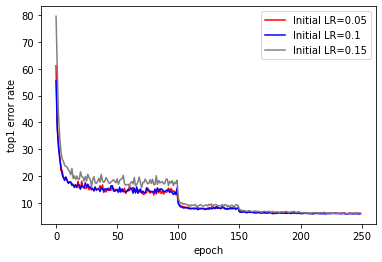

In [0]:
plt.plot(x, lr_005, color='red', label='Initial LR=0.05')
plt.plot(x, lr_010, color='blue', label='Initial LR=0.1')
plt.plot(x, lr_015, color='gray', label='Initial LR=0.15')
plt.legend() 

plt.xlabel('epoch')
plt.ylabel('top1 error rate')

# plt.savefig(path + '/lr.jpg')
plt.show()

### The result of different optimizers

In [0]:
Nesterov = np.loadtxt(path + '/v_bc.txt')
RMSprop = np.loadtxt(path + '/error_test_RMSprop_BC.txt')
Momentum = np.loadtxt(path + '/error_test_MomentumSGD_BC.txt')

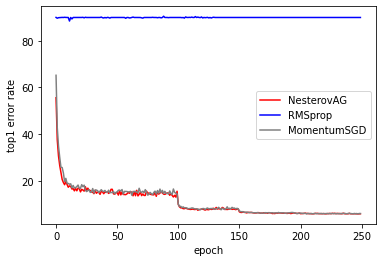

In [0]:
plt.plot(x, Nesterov, color='red', label='NesterovAG')
plt.plot(x, RMSprop, color='blue', label='RMSprop')
plt.plot(x, Momentum, color='gray', label='MomentumSGD')
plt.legend() 

plt.xlabel('epoch')
plt.ylabel('top1 error rate')

# plt.savefig(path + '/optimizer.jpg')
plt.show()

### Result of Different CNN Architecture

In [0]:
c_9_bcp = np.loadtxt(path + '/v_CNN9_bcp.txt')
c_11_bcp = np.loadtxt(path + '/v_bc_p.txt')
c_13_bcp = np.loadtxt(path + '/v_conv13_p.txt')

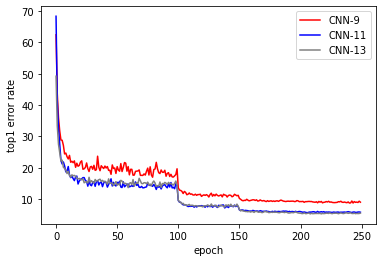

In [16]:
plt.plot(x, c_9_bcp, color='red', label='CNN-9')
plt.plot(x, c_11_bcp, color='blue', label='CNN-11')
plt.plot(x, c_13_bcp, color='gray', label='CNN-13')
plt.legend() 

plt.xlabel('epoch')
plt.ylabel('top1 error rate')

plt.savefig(path + '/cnn_bcp.jpg')
plt.show()

In [0]:
c_9_std = np.loadtxt(path + '/v_CNN9_std.txt')
c_9_bc = np.loadtxt(path + '/v_CNN9_bc.txt')
c_9_bcp = np.loadtxt(path + '/v_CNN9_bcp.txt')

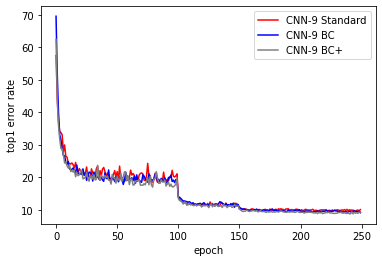

In [31]:
plt.plot(x, c_9_std, color='red', label='CNN-9 Standard')
plt.plot(x, c_9_bc, color='blue', label='CNN-9 BC')
plt.plot(x, c_9_bcp, color='gray', label='CNN-9 BC+')
plt.legend() 

plt.xlabel('epoch')
plt.ylabel('top1 error rate')

plt.savefig(path + '/cnn_9.jpg')
plt.show()

In [0]:
c_9_std = np.loadtxt(path + '/v_CNN13_std.txt')
c_9_bc = np.loadtxt(path + '/v_CNN13_bc.txt')
c_9_bcp = np.loadtxt(path + '/v_conv13_p.txt')

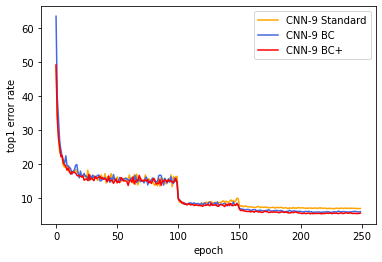

In [39]:
plt.plot(x, c_9_std, color='orange', label='CNN-9 Standard')
plt.plot(x, c_9_bc, color='royalblue', label='CNN-9 BC')
plt.plot(x, c_9_bcp, color='red', label='CNN-9 BC+')
plt.legend() 

plt.xlabel('epoch')
plt.ylabel('top1 error rate')

plt.savefig(path + '/cnn_13.jpg')
plt.show()

### Result of Ablation Analysis (on Mixing methods)




In [0]:
a = np.loadtxt(path + '/v_a.txt')
ab = np.loadtxt(path + '/v_ab.txt')

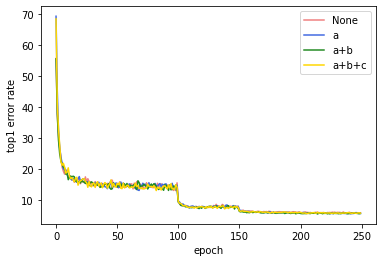

In [0]:
plt.plot(x, v_bc, color='lightcoral', label='None')
plt.plot(x, a, color='royalblue', label='a')
plt.plot(x, ab, color='forestgreen', label='a+b')
plt.plot(x, v_bcp, color='gold', label='a+b+c')
plt.xlabel('epoch')
plt.ylabel('top1 error rate')
plt.legend()

# plt.savefig(path + '/mixing.jpg')
plt.show()

### Result of Ablation Analysis (on labels)

In [0]:
v_single = np.loadtxt(path + '/error_test_single_label.txt')
v_multi = np.loadtxt(path + '/v_multi_label.txt')
v_ratio = np.loadtxt(path + '/v_bc.txt')

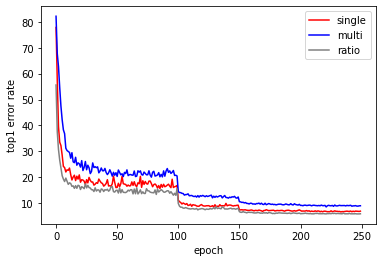

In [41]:
plt.plot(x, v_single, color='red', label='single')
plt.plot(x, v_multi, color='blue', label='multi')
plt.plot(x, v_ratio, color='gray', label='ratio')
plt.legend() 

plt.xlabel('epoch')
plt.ylabel('top1 error rate')

# plt.savefig(path + '/label.jpg')
plt.show()

### Result of Ablation Analysis (on number of mixed classed)

In [0]:
v_N1 = np.loadtxt(path + '/error_test_N1.txt')
v_N12 = np.loadtxt(path + '/error_test_N12.txt')
v_N2 = np.loadtxt(path + '/v_bc_p.txt')

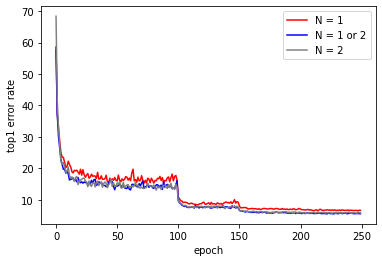

In [43]:
plt.plot(x, v_N1, color='red', label='N = 1')
plt.plot(x, v_N12, color='blue', label='N = 1 or 2')
plt.plot(x, v_N2, color='gray', label='N = 2')
plt.legend() 

plt.xlabel('epoch')
plt.ylabel('top1 error rate')

# plt.savefig(path + '/nclass.jpg')
plt.show()